## Importing necessary libraries

In [14]:
!pip install numpy

In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt
import cv2
from sklearn import datasets
from PIL import Image
import numpy as np
import time

In [16]:
digits = datasets.load_digits()
len(digits.images)

1797

## Showing 50 images using matplotlib

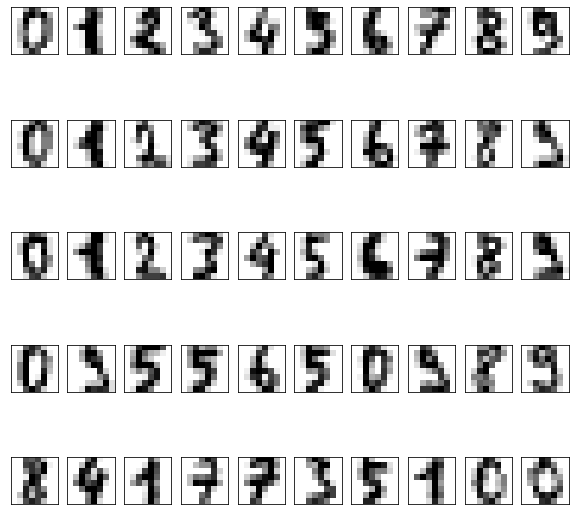

In [17]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
plt.show()

## Vertical & Horizontal Projection Functions

In [18]:
def Horizontal_Projection(image):
    array = np.array(image)
    horz_proj = np.array([np.count_nonzero(row) for row in array])
    return horz_proj

def Verticacl_Projection(image):
    array = np.array(image)
    img_trans = array.transpose()
    ver_proj = np.array([np.count_nonzero(row) for row in img_trans])
    return ver_proj

## Distance & Similarity Functions

In [19]:
def correlation(x,y):
    fracA = sum((x-np.average(x))*(y-np.average(y)))
    fracB = np.sqrt(sum(np.power(x-np.average(x),2)))*np.sqrt(sum(np.power(y-np.average(y),2)))
    return fracA/fracB

def minkowski_distance(x,y,p):
    return np.sum(np.abs(x-y)**p)**(1/p)

def euclidianne_distance(x,y):
    return minkowski_distance(x,y,2)

def manhathan_distance(x,y):
    return minkowski_distance(x,y,1)

def lim_plus_distance(x,y):
    return np.max(np.abs(x-y))

def lim_min_distance(x,y):
    return np.min(np.abs(x-y))

def cosine(x,y):
    return np.sum(x*y)/(np.sqrt(np.sum(x**2))*np.sqrt(np.sum(y**2)))

# Using Vertical Projection

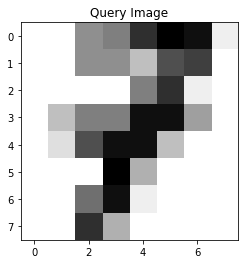

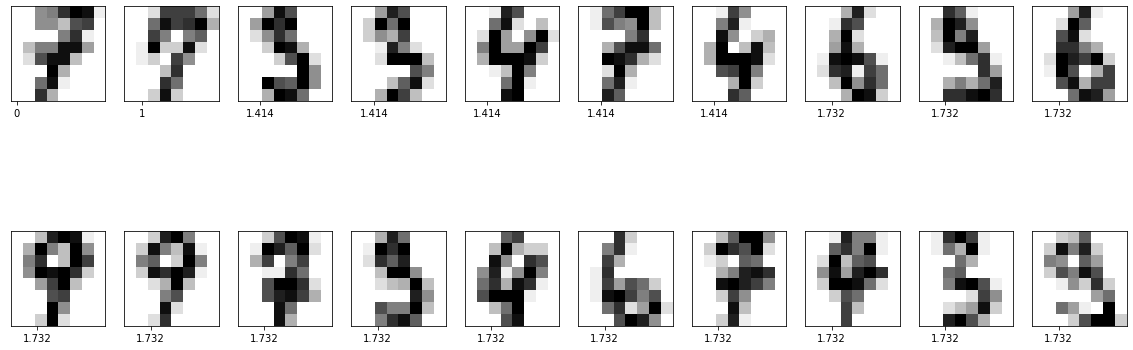

In [27]:
#Getting one Query Image
query_image = digits.images[7]
plt.imshow(query_image,cmap ='binary')
plt.title(label="Query Image")
QueryProjection = Verticacl_Projection(query_image)

images_descriptors = [{ 'image':image,'desc':Verticacl_Projection(image), 'distance': euclidianne_distance(QueryProjection,Verticacl_Projection(image))} for image in digits.images]

images_descriptors.sort(key = lambda x:x['distance'])


plt.figure(figsize=(20,20))
plt.title(label="Result")
for i in range(20):
    image_and_desc = images_descriptors[i]
    plt.subplot(5,10,i+1)
    plt.xticks([image_and_desc['distance']])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_and_desc['image'], cmap=plt.cm.binary)
plt.show()

## Pixel By Pixel Comparison

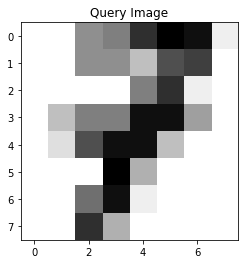

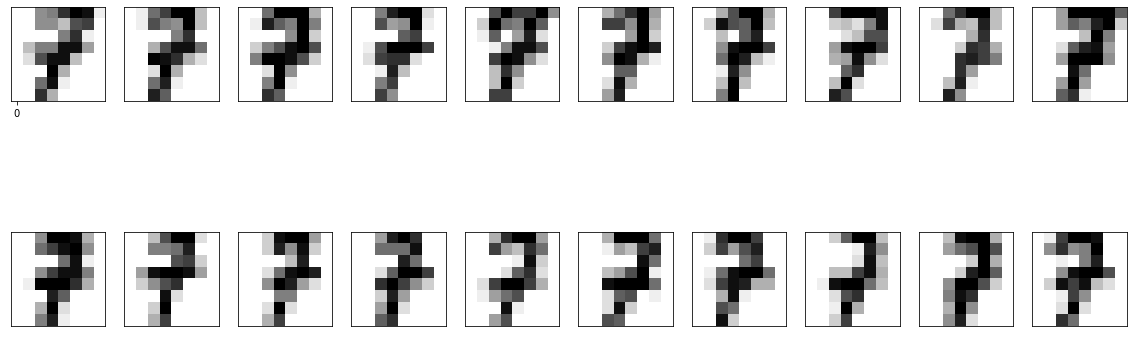

In [28]:
#Getting one Query Image
query_image = digits.images[7]
plt.title(label="Query Image")
plt.imshow(query_image,cmap ='binary')
Querydesc = query_image.flatten()

images_descriptors = [{ 'image':image,'desc':image.flatten(), 'distance': euclidianne_distance(Querydesc,image.flatten())} for image in digits.images]

images_descriptors.sort(key = lambda x:x['distance'])

plt.figure(figsize=(20,20))
for i in range(20):
    image_and_desc = images_descriptors[i]
    plt.subplot(5,10,i+1)
    plt.xticks([image_and_desc['distance']])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_and_desc['image'], cmap=plt.cm.binary)
plt.show()

# Trying the zenike

In [30]:
import mahotas
class ZernikeMoments:
	def __init__(self, radius):
		# store the size of the radius that will be
		# used when computing moments
		self.radius = radius
	def describe(self, image):
		# return the Zernike moments for the image
		return mahotas.features.zernike_moments(image, self.radius)

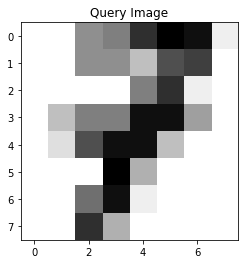

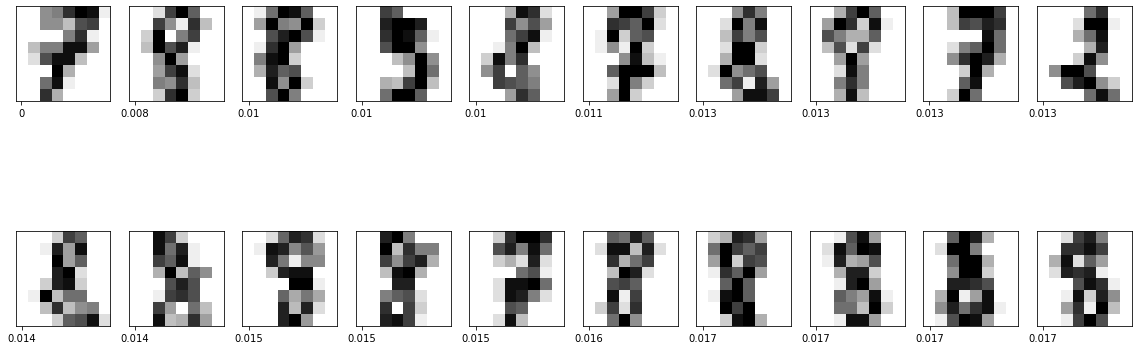

In [32]:
desc = ZernikeMoments(21)
moments = desc.describe(digits.images[0])

#Getting one Query Image
query_image = digits.images[7]
plt.title(label="Query Image")
plt.imshow(query_image,cmap ='binary')
QueryZernike = desc.describe(query_image)

images_descriptors = [{ 'image':image,'desc':desc.describe(image), 'distance': euclidianne_distance(QueryZernike,desc.describe(image))} for image in digits.images]

images_descriptors.sort(key = lambda x:x['distance'])

plt.figure(figsize=(20,20))
for i in range(20):
    image_and_desc = images_descriptors[i]
    plt.subplot(5,10,i+1)
    plt.xticks([image_and_desc['distance']])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_and_desc['image'], cmap=plt.cm.binary)
plt.show()

# Using Pixel To Pixel Comparison & Correlation

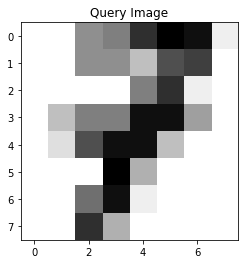

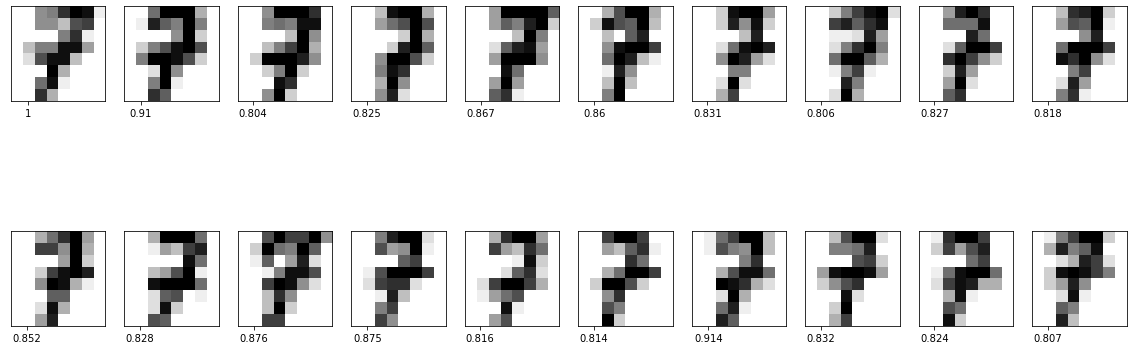

In [35]:
#Getting one Query Image
query_image = digits.images[7]
plt.title(label="Query Image")
plt.imshow(query_image,cmap ='binary')
Querydesc = query_image.flatten()

images_descriptors = [{ 'image':image,'desc':image.flatten(), 'distance': correlation(Querydesc,image.flatten())} for image in digits.images]

result = images_descriptors = list(filter(lambda x:x['distance'] > 0.8,images_descriptors))

#correlation is always between 1 & 0.

plt.figure(figsize=(20,20))
for i in range(20):
    image_and_desc = result[i]
    plt.subplot(5,10,i+1)
    plt.xticks([image_and_desc['distance']])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_and_desc['image'], cmap=plt.cm.binary)
plt.show()

# END